<h1>Fotoefektas - Notebook</h1>
<h2>Notebooko tikslai:</h2>
<ul>
    <li>Pakartoti: Kinetinė energija, atomo sandara, elektromagnetinių bangų dažnis</li>
    <li>Kas yra jonizacija</li>
    <li>Fotono energija</li>
    <li>Fotoefektas</li>
</ul>

In [81]:
from manim import *
import numpy as np
import matplotlib.pyplot as plt
import random
import math
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100

<h1 style="color:blue;">Kinetinė energija</h1>
<p><b>Kinetinė energija</b> - tai yra judėjimo energija. Kuo greičiau kūnas juda, tuo daugiau kinetinės energijos jis turi. Vykstant įvairiems fizikiniams veiksmams (dažniausiai susidurimams) kinetinė energija galima pakeisti į mechaninį darbą, arba kitos rūšies energija (šilumine, potencine ir pan). Kinetinės energijos formulė:</p>
<p><center style="font-size:30px; color:blue">$E_k=\frac{mv^2}{2}$</center></p>

In [82]:
def shift_with_v_and_a(mobject, dt=1/60):
    mobject.shift(mobject.v*dt)
    mobject.v+=mobject.a*dt
    if (mobject.get_center()[0] >= mobject.target_x):
        mobject.v = np.array([0,0,0],dtype='float64')
        mobject.a = np.array([0,0,0],dtype='float64')
        
def set_ke(mobject):
    mobject.E = (mobject.m * mobject.v[0] ** 2) / 2

def impact_energy_transfer(
    moving_object,
    target_object):
    target_object.set(E=moving_object.E)

def kinetic_energy_to_velocity(mobject):
    mobject.set(v=np.array([math.sqrt((2*mobject.E)/mobject.m),0,0]))

<p>Apačioje pavyzdžiuose matome, kaip skirtingo greičio rutuliukai (taip pat ir skirtingos kinetinės energijos!) atsitrenkia į didesnės masės dėžę. Iš dežės judėjimo greičio galime matyti, kad jei buvo perduotas skirtingas kiekis kinetinės energijos.</p>
<br>
<center style="font-size:10px; color:blue">note: paleidus lastelę (cell) turėtu atsirasti rausva juosta, o už jos vaizdo įrašai. </center>

In [83]:
%%manim -qh -v WARNING kinectic_energy_demo
class kinectic_energy_demo(Scene):
    def construct(self):
        
        #scene params
        fps = 60
        dt = 1/fps
        
        #Ball mobject
        ball = Circle(color=GREEN, fill_opacity=1).shift(4*LEFT)
        ball.set(v=np.array([3,0,0], dtype='float64'))
        ball.set(a=np.array([0,0,0], dtype='float64'))
        ball.m = 1
        
        target = Square(color=RED, fill_opacity=1).shift(RIGHT)
        target.m = 3
        
        ball.set(target_x=target.get_center()[0]-target.width)
        
        ball.add_updater(shift_with_v_and_a)
        
        #before collision
        set_ke(ball)
        self.add(ball, target)
        self.play(ball.animate())
        #after_collision
        impact_energy_transfer(ball, target)
        kinetic_energy_to_velocity(target)
        target.target_x = 10
        #adding friction
        target.a = np.array([0,0,0])
        target.add_updater(shift_with_v_and_a)
        self.wait(2)

In [84]:
%%manim -qh -v WARNING kinectic_energy_demo
class kinectic_energy_demo(Scene):
    def construct(self):
        
        #scene params
        fps = 60
        dt = 1/fps
        
        #Ball mobject
        ball = Circle(color=PURPLE, fill_opacity=1).shift(4*LEFT)
        ball.set(v=np.array([5,0,0], dtype='float64'))
        ball.set(a=np.array([0,0,0], dtype='float64'))
        ball.m = 1
        
        target = Square(color=RED, fill_opacity=1).shift(RIGHT)
        target.m = 3
        
        ball.set(target_x=target.get_center()[0]-target.width)
        
        ball.add_updater(shift_with_v_and_a)
        
        #before collision
        set_ke(ball)
        self.add(ball, target)
        self.play(ball.animate())
        #after_collision
        ball.clear_updaters()
        impact_energy_transfer(ball, target)
        kinetic_energy_to_velocity(target)
        target.target_x = 10
        #adding friction
        target.a = np.array([0,0,0])
        target.add_updater(shift_with_v_and_a)
        self.wait()


<h1 style="color:blue;">Atomo sandara</h1>
<p>Atomas yra sudarytas iš sunkaus <b>branduolio</b>, ir aplink ji skriejančių, lengvų, neigiamą tūrį turinčiu <b>elektronų</b> . Atomo branduolys yra sudarytas iš teigiamai įelektrintų dalelių (<b>protonų</b>) ir neturinčių krūvio dalelių (<b>neutronų</b>). Abi šios dalelės apytiksliai turi vienodą masę (<b>1 atominį masės vienetą</b>). Iš tikrųjų neturonai yra šiek tiek sunkesni, o kodėl taip yra sužinosime kiek vėliau. Elektronų masė maždaug 1000 kartų mažesnė nei protonų ar neutronų!</p>

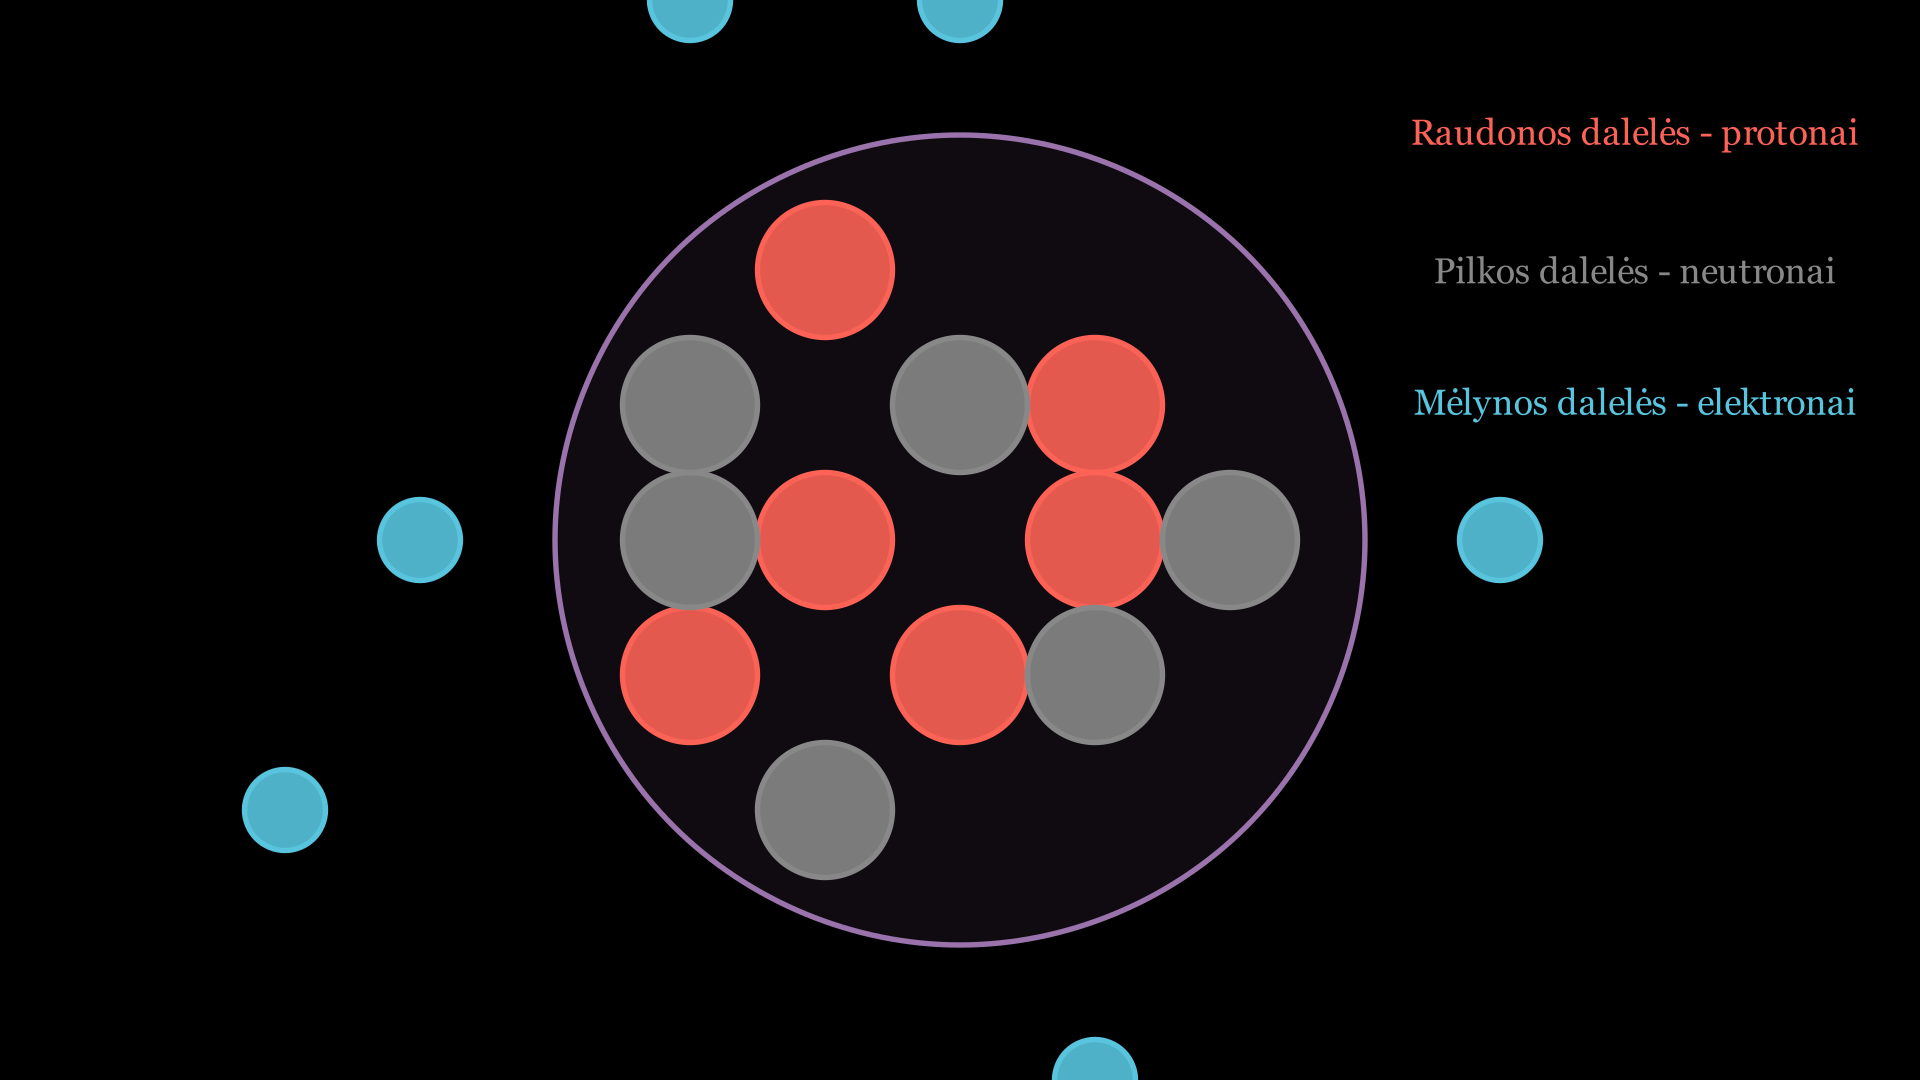

In [5]:
%%manim -qh -v WARNING atom_model
class atom_model(Scene):
    def construct(self):
        contour = Circle(radius=3, fill_opacity = 0.1, color = PURPLE)
        protons = VGroup(
            Circle(radius=0.5, fill_opacity = 0.9, color = RED).shift(2*UP+LEFT),
            Circle(radius=0.5, fill_opacity = 0.9, color = RED).shift(LEFT),
            Circle(radius=0.5, fill_opacity = 0.9, color = RED).shift(2*LEFT+DOWN),
            Circle(radius=0.5, fill_opacity = 0.9, color = RED).shift(RIGHT),
            Circle(radius=0.5, fill_opacity = 0.9, color = RED).shift(DOWN),
            Circle(radius=0.5, fill_opacity = 0.9, color = RED).shift(RIGHT+UP),
        )
        neutrons = VGroup(
            Circle(radius=0.5, fill_opacity = 0.9, color = GREY).shift(UP+2*LEFT),
            Circle(radius=0.5, fill_opacity = 0.9, color = GREY).shift(2*LEFT),
            Circle(radius=0.5, fill_opacity = 0.9, color = GREY).shift(LEFT+2*DOWN),
            Circle(radius=0.5, fill_opacity = 0.9, color = GREY).shift(2*RIGHT),
            Circle(radius=0.5, fill_opacity = 0.9, color = GREY).shift(UP),
            Circle(radius=0.5, fill_opacity = 0.9, color = GREY).shift(RIGHT+DOWN),
        )
        
        electrons = VGroup(
            Circle(radius=0.3, fill_opacity = 0.9, color = BLUE).shift(4*UP+2*LEFT),
            Circle(radius=0.3, fill_opacity = 0.9, color = BLUE).shift(4*LEFT),
            Circle(radius=0.3, fill_opacity = 0.9, color = BLUE).shift(5*LEFT+2*DOWN),
            Circle(radius=0.3, fill_opacity = 0.9, color = BLUE).shift(4*RIGHT),
            Circle(radius=0.3, fill_opacity = 0.9, color = BLUE).shift(4*UP),
            Circle(radius=0.3, fill_opacity = 0.9, color = BLUE).shift(RIGHT+4*DOWN),
        )
        paaiskinimai = VGroup(
            Text(text='Raudonos dalelės - protonai', color=RED).scale(0.4),
            Text(text='Pilkos dalelės - neutronai', color=GREY).shift(DOWN).scale(0.4),
            Text(text='Mėlynos dalelės - elektronai', color=BLUE).shift(2*DOWN).scale(0.4)
        ).shift(5*RIGHT+3*UP)
        self.add(contour, protons, neutrons, electrons, paaiskinimai)

<h1 style="color:blue;">Elektromagnetinių bangų dažnis</h1>

<p>Elektromagnetinės bangos dažnis prodo, <b>kiek kartų elektromagnetinės bangos elektrinis, arba magnetinis laukas suvirpa kartų per vienetinį laiką</b>.SI matavimo vienetų sistemoje vienetinis laikas yra 1 sekundė. Bangos dažnis yra esminis fizikinis dydis nuo kurio priklauso bangos sąvybės.</p>

In [85]:
import ipywidgets as widgets
frequency_slider = widgets.IntSlider(
    value=4,
    min=0,
    max=10,
    step=1,
    description="dažnis, Hz:",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
amplitude_slider = widgets.IntSlider(
    value=2,
    min=1,
    max=10,
    step=1,
    description="Amplitudė, Vm",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def plot_sinusoidal(frequency, amplitude):
    t = np.linspace(0,1,1000)
    y = amplitude*np.sin(2*np.pi*t*frequency)
    freq_marker1, freq_marker2 = \
        [0,1/frequency],[0,0]
    #plt.plot(freq_marker1, freq_marker2)
    subplot1 = plt.plot(t,y)
    subplot2 = plt.plot(freq_marker1,freq_marker2, color=RED)
    plt.ylabel("elekrinis laukas(E), Vm", fontsize=15)
    plt.xlabel('laikas(t), s', fontsize=15)
    plt.show()

iplot = widgets.interactive(
    plot_sinusoidal,
    frequency = frequency_slider,
    amplitude = amplitude_slider
)
iplot

interactive(children=(IntSlider(value=4, continuous_update=False, description='dažnis, Hz:', max=10), IntSlide…

<center><h1 style="color:red;">RAUDONA LINIJA RODO DAŽNĮ</h1></center>

In [80]:
# PLANCK_CONSTANT = 6.63 * 10 ** (-31)  #Js
# SPEED_OF_LIGHT = 3 * 10 ** 8          #m/s
# ELECTRON_MASS = 9.1 * 10 ** (-31)     #kg

# class photoelectric_effect_experiment():
#     def __init__(
#         self,
#         ionisation_work_data,
#         metal_name,
#         photon_energy_data,
#         t_start=0,
#         t_experiment=10,
#         light_intensity=1,
#         electric_field=1,
#         light_frequency=1
#     ):
#         self.metals_data = json.load(open(ionisation_work_data))
#         self.light_data = json.load(open(photon_energy_data))
#         self.t_start = t_start
#         self.t = t_experiment
#         self.intensity = light_intensity
#         self.electric_field = electric_field
#         self.freq = light_frequency
#         self.metal = metal_name
#         self.ionisation_work = metals_data[metal_name]
#         self.photon_energy = self.freq * PLANCK_CONSTANT
#     def calculate_kinetic_energy(self):
#         self.electron_ke = self.photon_energy - self.ionisation_work
#         if self.electoron_ke <= 0: 
#             self.electron_ke = 0
#     def start_experiment(self, intervals):
#         self.t = np.linspace(self.t_start, self.t, intervals)
#         self.count = []
#         self.energies = []
#         if self.photon_energy < self.ionisation_work:
#             self.count = np.zeros(len(self.t))
#         else:
#             self.count = self.t * self.intensity
#             self.energies = [self.electron_ke] * len(self.t)
#     def return_results(self):
#         return {
#             "time":self.t,
#             "energies":self.energies,
#             "count":self.count
#         }
        